In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
from tqdm import tqdm_notebook as tqdm
from sklearn.metrics import roc_auc_score, roc_curve
from scikitplot.metrics import plot_roc

%matplotlib inline

In [2]:
%set_env OCTAVE_EXECUTABLE=C:\Octave\octave-5.1.0-w64-64\mingw64\bin\octave.exe

env: OCTAVE_EXECUTABLE=C:\Octave\octave-5.1.0-w64-64\mingw64\bin\octave.exe


In [3]:
from oct2py import Oct2Py
oc = Oct2Py()

In [4]:
n_obj = 10
dim = 3
n_models = 5
k = 10

X = np.random.rand(n_obj, dim)
w = np.random.rand(dim, n_models)
pi = np.zeros(n_models)
pi[0] = pi[1] = 0.5

a = oc.generate_mixture_logistic(X, w, pi.reshape(-1, 1))
b = oc.generate_single_logistic(X, w[:, 0].reshape(-1, 1))

In [5]:
X, y, idx = oc.generate_syntethic_cluster(100, 2, 0, 1., 0, 0, nout = 3)
y = y.reshape(y.size)

In [6]:
if X.shape[1] == 2:
    X = np.hstack([X, np.ones((X.shape[0], 1))])
X[:10]

array([[-1.96445665, -2.11450454,  1.        ],
       [-0.63806555, -2.25072529,  1.        ],
       [-2.33446877, -5.05033353,  1.        ],
       [-2.77719204, -2.93415695,  1.        ],
       [-3.12531448, -5.49157314,  1.        ],
       [-2.82962615, -3.3097013 ,  1.        ],
       [-1.21572272, -3.90886191,  1.        ],
       [-2.47499498, -1.84525275,  1.        ],
       [-2.75159658, -2.81135862,  1.        ],
       [-3.86170562, -2.90847781,  1.        ]])

In [7]:
A_single, w, hessian_single = oc.maximize_evidence_single_logistic_laplace(X, y.reshape(-1, 1), nout = 3)
w_single = w.reshape(3)

In [8]:
A, w, hessian = oc.maximize_evidence_multilevel_logistic_laplace(X, y.reshape(-1, 1), idx, nout = 3)

In [9]:
w

Cell([array([[ 1.54874314],
       [-0.68198425],
       [ 2.30220372]]),
       array([[ 7.71360249e-01],
       [-9.29502237e-01],
       [ 5.09921684e-06]])])

In [10]:
A

Cell([array([[0.38067354, 0.        , 0.        ],
       [0.        , 1.74732314, 0.        ],
       [0.        , 0.        , 0.14221104]]),
       array([[1.49901996e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.06577586e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 6.43059592e+04]])])

In [11]:
hessian

Cell([array([[ 75.83806153,  76.16430485, -25.59085408],
       [ 76.16430485,  86.80350792, -26.49317203],
       [-25.59085408, -26.49317203,   9.27372071]]),
       array([[9.78672390e+01, 8.93137605e+01, 2.87285658e+01],
       [8.93137605e+01, 9.49651826e+01, 2.79970558e+01],
       [2.87285658e+01, 2.79970558e+01, 6.43346903e+04]])])

In [12]:
def get_significance_level(w0, hess0, w1, hess1):
    score, n = oc.get_significance_level_no_intersect(w0, hess0, w1, hess1, nout = 2)
    return 1 - sps.chi2(df = n).cdf(score)

def get_logistic_bound(grid, w):
    return - w[0] / w[1] * grid - w[2] / w[1]

[ 1.54874314 -0.68198425  2.30220372]
[ 7.71360249e-01 -9.29502237e-01  5.09921684e-06]


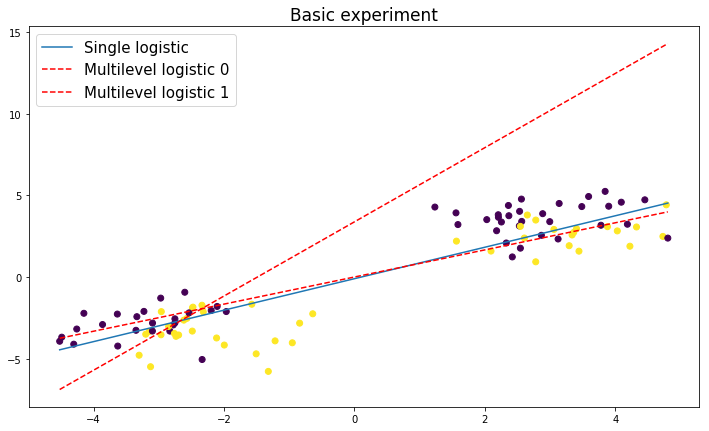

In [13]:
plt.figure(figsize = (12, 7))
plt.scatter(X[:, 0], X[:, 1], c = (y + 1) // 2)
grid = np.linspace(X[:, 0].min(), X[:, 0].max(), 500)
plt.plot(grid, get_logistic_bound(grid, w_single), label = 'Single logistic')
plt.title('Basic experiment', fontsize = 17)
for i in range(2):
    w_part = w[i].reshape(3)
    print(w_part)
    plt.plot(grid, get_logistic_bound(grid, w_part),
             label = 'Multilevel logistic ' + str(i), color = 'red',
             ls = '--')
plt.legend(fontsize = 15)
plt.show()

Видим, что на двух кластерах имеется различие. Сравним две модели на кластерах, а также общую при помощи s_score

In [14]:
get_significance_level(w[0], hessian[0], w[1], hessian[1])

0.13034801969943888

Критерий отвергает гипотезу неразличимости моделей!

Обучим логистическую регрессию в нетривиальном случае

In [15]:
y_fake = np.array([int(X[i][1] > 3) for i in range(X.shape[0])])
y_fake[y_fake == 0] = -1
y_fake

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1, -1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
        1, -1, -1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1, -1,  1, -1, -1,  1, -1, -1, -1,  1, -1,  1])

In [16]:
func_args = {}
_, w = oc.maximize_evidence_single_logistic_laplace(X, y_fake.reshape(-1, 1), nout = 2)

In [17]:
w

array([[ 2.27111782e-06],
       [ 2.28544996e+01],
       [-6.84816020e+01]])

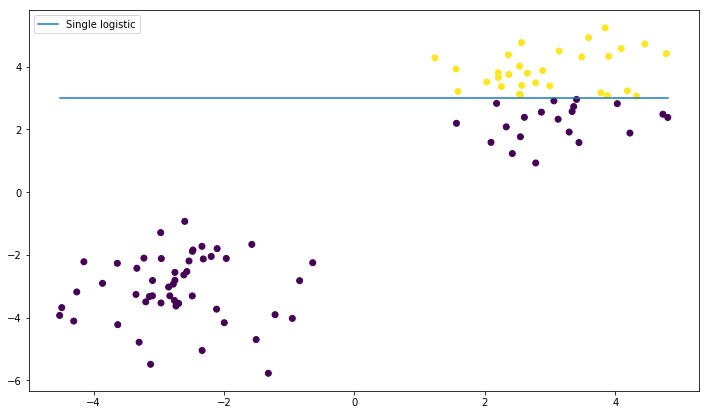

In [18]:
plt.figure(figsize = (12, 7))
plt.scatter(X[:, 0], X[:, 1], c = (y_fake + 1) // 2)
grid = np.linspace(X[:, 0].min(), X[:, 0].max(), 500)
plt.plot(grid, - w[0] / w[1] * grid - w[2] / w[1], label = 'Single logistic')
plt.legend()
plt.show()

Получается, что за месяц я наконец-таки научился нормально обучать линейную регрессию и считать s-score. Это уже почти победа

### Исследование ошибки первого рода :)

Проведём следующее исследование: повторим эксперимент, проведённый выше, но с различным размером выборки в кластерах. Поймем, в какой момент начнет отвергаться гипотеза. Полученное число будем использовать в качестве изначальной оценки для размера блока в предложенном алгоритме.

Поскольку гипотеза неверна, то есть имеем справедливость альтернативной гипотезы $H_1$, интересующая нас величина - мощность критерия, которую можно проверить при помощи бутстрепа.

Постараемся добиться мощности критерия, равной $0.8$

In [21]:
def get_significance_clustered(n_points = 10):
    X, y, idx = oc.generate_syntethic_cluster(n_points * 2, 2, 0, 1., 0, 0, nout = 3)
    X = np.hstack([X, np.ones((X.shape[0], 1))])
    A, w, hessian = oc.maximize_evidence_multilevel_logistic_laplace(X, y.reshape(-1, 1), idx, nout = 3)
    return get_significance_level(w[0], hessian[0], w[1], hessian[1])

def get_criterion_power(n_points, alpha = 0.05):
    n_rejected = 0
    n_samples = 100 # Вычисляем с точностью до 10^(-1)
    for i in range(n_samples):
        pval = get_significance_clustered(n_points)
        n_rejected += (pval < alpha)
    return n_rejected / n_samples

Переберем размер от 1 до 100

In [20]:
grid = np.arange(1, 100)
power = []

for n in tqdm(grid):
    power.append(get_criterion_power(n))

plt.figure(figsize = (12, 7))
plt.title('Additonal sample size investigation', fontsize = 15)
plt.xlabel('Number of elements in cluster', fontsize = 12)
plt.ylabel('Power of criterion', fontsize = 12)
plt.plot(grid, np.ones_like(grid) * 0.8, ls = '--')
plt.plot(grid, power)
plt.show()

** Warning: Cannot interrupt Octave on Windows
** Warning: Cannot interrupt Octave on Windows
** Warning: Cannot interrupt Octave on Windows


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\logip\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-20-8eec1d250cf3>", line 5, in <module>
    power.append(get_criterion_power(n))
  File "<ipython-input-19-4f83c8724913>", line 11, in get_criterion_power
    pval = get_significance_clustered(n_points)
  File "<ipython-input-19-4f83c8724913>", line 4, in get_significance_clustered
    A, w, hessian = oc.maximize_evidence_multilevel_logistic_laplace(X, y.reshape(-1, 1), idx, nout = 3)
  File "C:\Users\logip\Anaconda3\lib\site-packages\oct2py\dynamic.py", line 96, in __call__
    return self._ref().feval(self.name, *inputs, **kwargs)
  File "C:\Users\logip\Anaconda3\lib\site-packages\oct2py\core.py", line 369, in feval
    store_as=store_as, plot_dir=plot_dir)
  File "C:\Users\logip\Anaconda3\lib\site-packages\oct2py\core.py", line 543, in _feval
    convert_to_float=sel

KeyboardInterrupt: 

Теперь посмотрим, что будет, если добавлять по 100 объектов

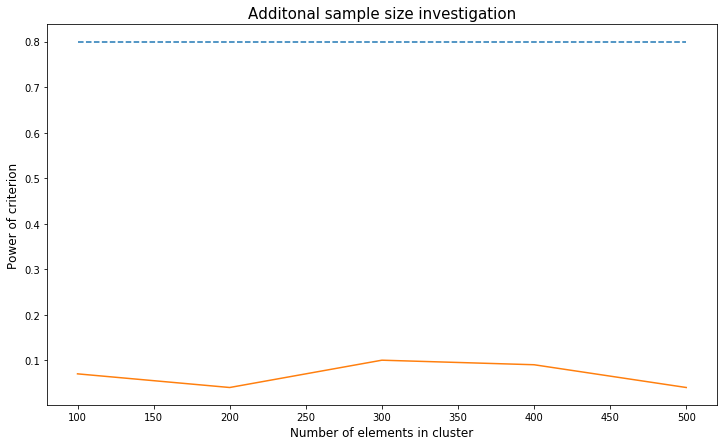

In [126]:
grid = np.arange(1, 6) * 100
power = []

for n in tqdm(grid):
    power.append(get_criterion_power(n))

plt.figure(figsize = (12, 7))
plt.title('Additonal sample size investigation', fontsize = 15)
plt.xlabel('Number of elements in cluster', fontsize = 12)
plt.ylabel('Power of criterion', fontsize = 12)
plt.plot(grid, np.ones_like(grid) * 0.8, ls = '--')
plt.plot(grid, power)
plt.show()

Получаем, что оптимальный размер блока равен где-то $30$. Именно его и возьмем для исследования ошибки алгоритма

### Генерация одного кластера данных

Чтобы убедиться в том, что предложенный алгоритм может дать результат, сгенерируем набор синтетических данных аналогично на двух кластерах, но после каждого блока разделяющие прямые будут поворачиваться вокруг заданных точек. Таким образом, это проэмулирует ситуацию, в которой одному признаковому описанию соответствуют разные ответы.

Будем случайно генерировать матрицу ковариаций и генерировать выборку нужного размера.

Определим сначала функцию генерации одного кластера вокруг заданной точки и генерации классов с учетом нормали к разделяющей прямой

In [6]:
def get_one_cluster(sample_size, point, normal):
    alphas = [1, 1]
    sigma = np.diag(alphas)
    X_sample = sps.multivariate_normal(mean = point, cov = sigma).rvs(sample_size)
    y = np.dot(X_sample - point, normal) > 0
    return X_sample, y * 2 - 1

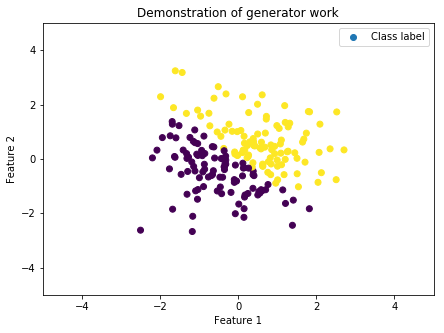

In [7]:
X, y = get_one_cluster(200, [0, 0], [1, 1])

plt.figure(figsize = (7, 5))
plt.title('Demonstration of generator work')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.scatter(X[:, 0], X[:, 1], c = (y + 1) // 2, label = 'Class label')
plt.legend()
plt.show()

Возможно, следует добавить в распределение некоторый шум, но на первом этапе рассмотрим идеальное разделение. Обучим на кластере логистическую регрессию.

In [8]:
A, w = oc.maximize_evidence_single_logistic_laplace(X, y.reshape(-1, 1), nout = 2)
w

array([[68.55017925],
       [69.89470963]])

Видим, что вектор нормали $(1, 1)$ почти угадан, качество разделения получится хорошим

### Исследование мощности критерия

Для предлагаемого алгоритма требуется отыскать оптимальный размер блока, на котором строится новая модель. Этот размер - гиперпараметр, однако в конкретном случае можно подобрать его, исходя из мощности критерия.

В зависимости от того, насколько различаются разделяющие прямые (по косинусному расстоянию), мощности могут получаться различными. Поэтому необходимо зафиксировать угол поворота нормали и посмотреть, на каком размере выборки мощность критерия станет достаточно высокой.

Для этого рассмотрим одиночную модель логистической регрессии, для различения будем использовать s-score

In [22]:
def rotate_origin_only(xy, radians):
    """Only rotate a point around the origin (0, 0)."""
    x, y = xy
    x_new = x * np.cos(radians) + y * np.sin(radians)
    y_new = -x * np.sin(radians) + y * np.cos(radians)
    return [x_new, y_new]

In [23]:
rotate_origin_only([1, 1], np.pi / 4.)

[1.4142135623730951, 0.0]

Напишем функцию, которая сгенерирует 2 кластера вокруг одной и той же точки с поворотом нормали на заданный угол

In [24]:
def generate_rotation_samples(sample_size, radians, point = [0, 0], normal1 = None):
    if normal1 is None:
        alpha_start = np.pi * np.random.rand()
        normal1 = [np.cos(alpha_start), np.sin(alpha_start)]
    normal2 = rotate_origin_only(normal1, radians)
    X1, y1 = get_one_cluster(sample_size, point, normal1)
    X2, y2 = get_one_cluster(sample_size, point, normal2)
    return X1, y1, X2, y2

Теперь напишем вычисление мощности критерия по размеру выборки. Для этого будем генерировать 100 примеров пар выборок и смотреть, в каком проценте случаев отвергается гипотеза совпадения моделей. Мощность таким образом будет получена с точностью до $0.1$

Возьмём угол поворота $\alpha = \frac{\pi}{12}$

In [25]:
def get_criterion_power(sample_size, alpha = np.pi / 12):
    n_samples = 100
    n_rejections = 0
    for i in range(n_samples):
        X1, y1, X2, y2 = generate_rotation_samples(sample_size, alpha)
        _, w1, hess1 = oc.maximize_evidence_single_logistic_laplace(X1, y1.reshape(-1, 1), nout = 3)
        _, w2, hess2 = oc.maximize_evidence_single_logistic_laplace(X2, y2.reshape(-1, 1), nout = 3)
        pval = get_significance_level(w1, hess1, w2, hess2)
        n_rejections += (pval < 0.05)
    return n_rejections / n_samples

Теперь переберем размер выборки от 1 до 100.

In [185]:
grid = np.arange(50, 120)
power = []

for n in tqdm(grid):
    p_new = get_criterion_power(n)
    print(p_new)
    power.append(p_new)

0.22
0.37
0.41
0.38
0.36
0.39
0.4
0.45
0.41
0.45
0.48
0.5
0.52
0.47
0.57
0.62
0.56
0.5
0.54
0.64
0.64
0.6
0.64
0.65
0.71
0.65
0.69
0.65
0.62
0.62
0.72
0.76
0.67
0.77
0.76
0.71
0.8
0.8
0.82
0.8
0.78
0.77
0.75
0.87
0.87
0.73
0.91
0.87
0.84
0.86
0.86
0.86
0.88
0.93
0.97
0.85
0.93
0.93
0.96
0.94
0.86
0.92
0.91
0.94
0.92
0.94
0.94
0.94
0.92
0.93


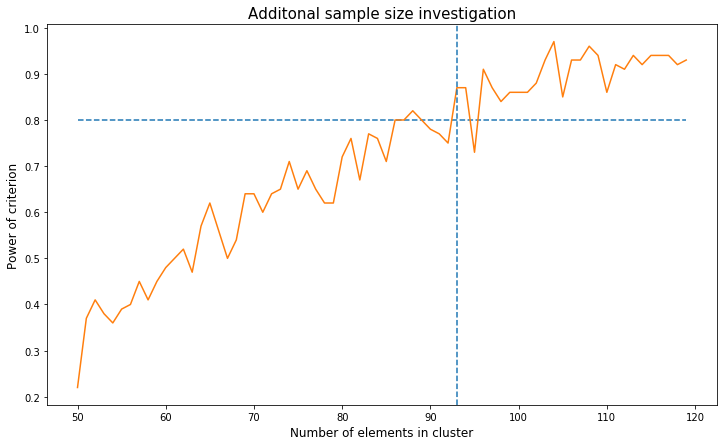

In [189]:
plt.figure(figsize = (12, 7))
plt.title('Additonal sample size investigation', fontsize = 15)
plt.xlabel('Number of elements in cluster', fontsize = 12)
plt.ylabel('Power of criterion', fontsize = 12)
plt.plot(grid, np.ones_like(grid) * 0.8, ls = '--')
plt.plot(grid, power)
plt.axvline(93, ls = '--')
plt.show()

Видим, что на размере выборки около 90 достигается значение мощности $0.8$, а значит можно использовать данный критерий. При этом, как видно из анализа ошибки первого рода, такое значение допускает также мало ложных отвержений. Таким образом будем использовать такое значение, а именно размер блока $C = 93$

Впоследствии необходимо запустить этот же анализ с точностью до $0.01$

### Реализация алгоритма

Напишем функцию, которая будет делить пришедшую выборку на блоки заданного размера и давать предсказания вероятностей с помощью нового алгоритма. Затем сравним имеющиеся результаты по AUC-ROC с алгоритмом, обученным по всей выборке, а также обучаемый лишь на префиксах перед тем, как предсказывать следующий элемент (эмуляция процесса во времени)

In [4]:
def predict_logistic_proba(X, w):
    scores = X.dot(w)
    probas = np.exp(scores) / (1 + np.exp(scores))
    return probas

def predict_proba_multilevel(X, w, idx):
    X1 = X[idx == 1]
    X2 = X[idx == 2]
    pred1 = predict_logistic_proba(X1, w[0])
    pred2 = predict_logistic_proba(X2, w[1])
    pred = np.zeros(X.shape[0])
    pred[idx == 1] = pred1
    pred[idx == 2] = pred2
    return pred

def get_new_algo_predictions(X, y, block_size, idx):
    curr_start_ind = 0
    curr_learning_start = 0
    curr_w = np.zeros((2, 3))
    curr_hess = np.zeros((2, 3, 3))
    pred = []
    while curr_start_ind < X.shape[0]:
        curr_end_ind = min(X.shape[0], curr_start_ind + block_size)
        X_new = X[curr_start_ind: curr_end_ind]
        y_new = y[curr_start_ind: curr_end_ind]
        idx_new = idx[curr_start_ind: curr_end_ind]
        pred_new = predict_proba_multilevel(X_new, curr_w, idx_new)
        pred += pred_new.tolist()
        
        _, w_new, hess_new = oc.maximize_evidence_multilevel_logistic_laplace(X_new, y_new.reshape(-1, 1),
                                                                              idx_new.reshape(-1, 1),
                                                                              nout = 3)
        w_new = np.array([w.reshape(3) for w in w_new])
        pval1 = get_significance_level(curr_w[0].reshape(-1, 1), curr_hess[0], 
                                       w_new[0].reshape(-1, 1), hess_new[0])
        pval2 = get_significance_level(curr_w[1].reshape(-1, 1), curr_hess[1],
                                       w_new[1].reshape(-1, 1), hess_new[1])
        
        if pval1 < 0.05 or pval2 < 0.05:
            curr_w = w_new
            curr_hess = hess_new
            curr_learning_start = curr_start_ind
        else:
            X_new = X[curr_learning_start: curr_end_ind]
            y_new = y[curr_learning_start: curr_end_ind]
            idx_new = idx[curr_learning_start: curr_end_ind]
            _, w_new, hess_new = oc.maximize_evidence_multilevel_logistic_laplace(X_new, y_new.reshape(-1, 1),
                                                                                  idx_new.reshape(-1, 1),
                                                                                  nout = 3)
            w_new = np.array([w.reshape(3) for w in w_new])
            curr_w = w_new
            curr_hess = hess_new
            
        curr_start_ind = curr_end_ind
    return pred

def get_old_algo_predictions(X, y, block_size, idx):
    curr_start_ind = 0
    curr_w = np.zeros((2, 3))
    curr_hess = np.zeros((2, 3, 3))
    pred = []
    while curr_start_ind < X.shape[0]:
        curr_end_ind = min(X.shape[0], curr_start_ind + block_size)
        X_new = X[curr_start_ind: curr_end_ind]
        y_new = y[curr_start_ind: curr_end_ind]
        idx_new = idx[curr_start_ind: curr_end_ind]
        pred_new = predict_proba_multilevel(X_new, curr_w, idx_new)
        pred += pred_new.tolist()
        
        X_new = X[: curr_end_ind]
        y_new = y[: curr_end_ind]
        idx_new = idx[: curr_end_ind]
        _, w_new, hess_new = oc.maximize_evidence_multilevel_logistic_laplace(X_new, y_new.reshape(-1, 1),
                                                                              idx_new.reshape(-1, 1),
                                                                              nout = 3)
        w_new = np.array([w.reshape(3) for w in w_new])
        curr_w = w_new
        curr_hess = hess_new
            
        curr_start_ind = curr_end_ind
    return pred

### Генерация итогового датасета

Теперь будем генерировать данные для двух кластеров сразу. Сделаем так, чтобы обе разделяющие прямые сделали полный оборот (для этого надо сделать 24 генерации).

В каждом положении будем генерировать 2 блока, чтобы модель успевала учитывать изменения во времени. Итого должно получиться 48 блоков по 93 примера в каждом, и всё это на 2 кластерах. То есть получится около 10000 примеров.

Для начала сгенерируем один пример в качестве демонстрации

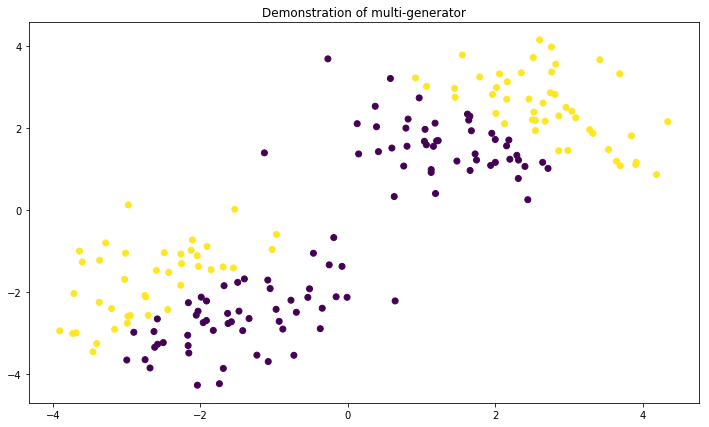

In [72]:
normal_left = [1, 1]
normal_right = [-1, 1]

X1, y1 = get_one_cluster(93, [2, 2], normal_left)
X2, y2 = get_one_cluster(93, [-2, -2], normal_right)
X = np.vstack([X1, X2])
y = np.concatenate([y1, y2])

plt.figure(figsize = (12, 7))
plt.title('Demonstration of multi-generator')
plt.scatter(X[:, 0], X[:, 1], c = (y + 1) // 2)
plt.show()

Видим, что в обоих кластерах есть разделяющие прямые, при этом они перпендикулярны друг другу 

In [73]:
X_all = np.empty(shape = (0, 2))
y_all = np.empty(shape = 0)
idx_all = np.empty(shape = 0)
sample_size = 93
alpha = np.pi / 12

normal_left = [1, 1]
normal_right = [-1, 1]

for alpha_ind in range(24):
    for i in range(2):
        X1_l, y1_l, X2_l, y2_l = generate_rotation_samples(sample_size, alpha, [-3, -3], normal_left)
        X1_r, y1_r, X2_r, y2_r = generate_rotation_samples(sample_size, alpha, [3, 3], normal_right)
        idx_new = np.concatenate([np.zeros(sample_size), np.ones(sample_size)]) + 1
        X_all = np.vstack([X_all, X2_l, X2_r])
        y_all = np.concatenate([y_all, y2_l, y2_r])
        idx_all = np.concatenate([idx_all, idx_new])
        
    normal_left = rotate_origin_only(normal_left, alpha)
    normal_right = rotate_origin_only(normal_right, alpha)

In [74]:
X_all = np.hstack([X_all, np.ones((X_all.shape[0], 1))])
X_all.shape, y_all.shape, idx_all.shape

((8928, 3), (8928,), (8928,))

### Тестирование алгоритма

Остаётся только получить предсказания и вычислить AUC-ROC для двух алгоритмов

In [75]:
pred_new = get_new_algo_predictions(X_all, y_all, 93 * 2, idx_all)

In [76]:
score_new = roc_auc_score((y_all + 1) // 2, pred_new)

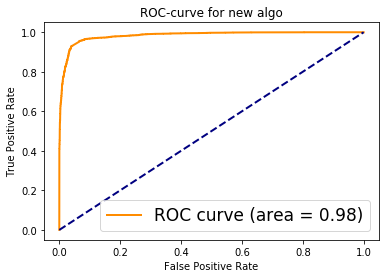

In [77]:
fpr, tpr, _ = roc_curve((y_all + 1) // 2, pred_new)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % score_new)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve for new algo')
plt.legend(loc="lower right", fontsize = 17)
plt.show()

In [78]:
pred_old = get_old_algo_predictions(X_all, y_all, 93 * 2, idx_all)

In [79]:
score_old = roc_auc_score((y_all + 1) // 2, pred_old)

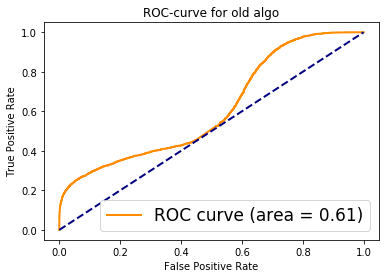

In [80]:
fpr, tpr, _ = roc_curve((y_all + 1) // 2, pred_old)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % score_old)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve for old algo')
plt.legend(loc="lower right", fontsize = 17)
plt.show()

### Визуализация датасета

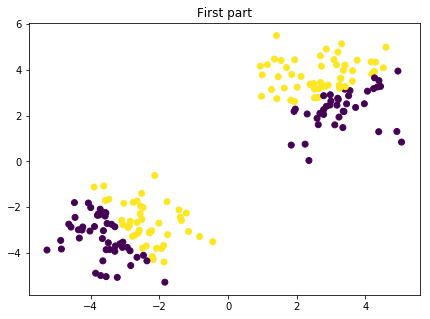

In [21]:
plt.figure(figsize = (7, 5))
plt.title('First part')
plt.scatter(X_all[:93 * 2, 0], X_all[:93 * 2, 1], c = (y_all[:93 * 2] + 1) // 2)
plt.show()

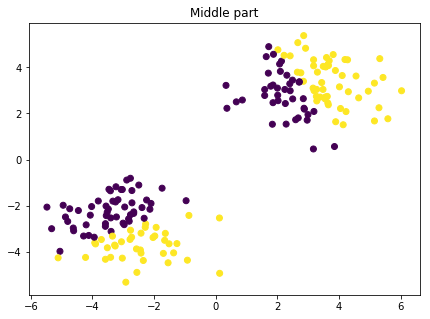

In [22]:
plt.figure(figsize = (7, 5))
plt.title('Middle part')
plt.scatter(X_all[93 * 24:93 * 26, 0], X_all[93 * 24:93 * 26, 1], c = (y_all[93 * 24:93 * 26] + 1) // 2)
plt.show()

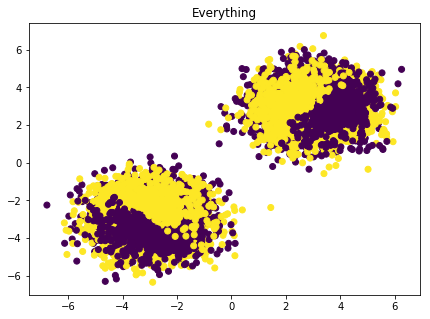

In [23]:
plt.figure(figsize = (7, 5))
plt.title('Everything')
plt.scatter(X_all[:, 0], X_all[:, 1], c = (y_all + 1) // 2)
plt.show()

### Применение для Boston Housing